In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist_data = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [4]:
train_X = mnist_data.train.images
train_y  = mnist_data.train.labels

test_X = mnist_data.test.images
test_y = mnist_data.train.labels

print('Train data is %d images.' %train_X.shape[0])
print('Test data is %d images.' %test_X.shape[0])

Train data is 55000 images.
Test data is 10000 images.


## Visualize some random images

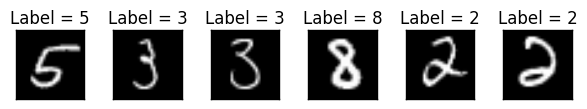

In [5]:
fig = plt.figure()
select_img = np.random.choice(train_X.shape[0], size=6, replace=False)
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1)
    plt.imshow(train_X[select_img[i],:].reshape((28, 28)), cmap=cm.gray)
    plt.title('Label = %d'  %np.argmax(train_y[select_img[i],:]))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

## Logistic Regression 

In [8]:
class LRModel(object):
    def __init__(self, train_X, train_y, test_X, test_y):
        self.train_X = train_X
        self.train_y = train_y
        self.test_X = test_X
        self.test_y = test_y
        
        self._build_graph()
        self.session = tf.Session(graph=self.graph)
        self.session.run(self.init_op)
    
    def _build_graph(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            self.x_holder = tf.placeholder(tf.float32, shape=[None, 784])
            self.y_holder = tf.placeholder(tf.float32, shape=[None, 10])
        
            self.w = tf.Variable(initial_value=tf.truncated_normal([784, 10]))
            self.b = tf.Variable(initial_value=tf.zeros([10]))
        
            self.logits = tf.matmul(self.x_holder, self.w) + self.b
            self.pred_ = tf.nn.softmax(self.logits)
        
            self.cost = tf.reduce_mean(
                tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.y_holder))
        
            self.optimizer = tf.train.GradientDescentOptimizer(0.01)
            self.train_op = self.optimizer.minimize(self.cost)
            
            self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.pred_, 1), tf.argmax(self.y_holder, 1)),
                                                   tf.float32))
            self.init_op = tf.initialize_all_variables()
    
    def fit(self, n_steps):
        for idx in range(n_steps):
            cur_loss, _ = self.session.run([self.cost, self.train_op], feed_dict={self.x_holder: self.train_X[:500,:],
                                                                              self.y_holder: self.train_y[:500,:]})
            print('step %d - loss = %f' %((idx+1, cur_loss)))
    
    def evaluate(self):
        accuracy_ = self.session.run([self.accuracy], feed_dict={self.x_holder: self.test_X[:100,:],
                                                                self.y_holder: self.test_y[:100,:]})

In [9]:
model = LRModel(train_X, train_y, test_X, test_y)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
model.fit(200)

InternalError: Blas SGEMM launch failed : a.shape=(500, 784), b.shape=(784, 10), m=500, n=10, k=784
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_7, Variable/read)]]
	 [[Node: Mean/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_111_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'MatMul', defined at:
  File "/Users/malzantot/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/malzantot/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-3d638f6c87b8>", line 1, in <module>
    model = LRModel(train_X, train_y, test_X, test_y)
  File "<ipython-input-8-093a6981c6cb>", line 8, in __init__
    self._build_graph()
  File "<ipython-input-8-093a6981c6cb>", line 21, in _build_graph
    self.logits = tf.matmul(self.x_holder, self.w) + self.b
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1769, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1454, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 768, in apply_op
    op_def=op_def)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2334, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/malzantot/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(500, 784), b.shape=(784, 10), m=500, n=10, k=784
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_7, Variable/read)]]
	 [[Node: Mean/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_111_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
